# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.

## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

## Setup

In [20]:
# Installing and Loading Necessary Libraries

install.packages('naniar')
install.packages('car')
install.packages('ggthemes')
install.packages('broom')
install.packages("dunn.test")

library(tidyverse)
library(naniar)
library(ggthemes)
library(car)
library(broom)
library(dunn.test)


Warning message:
"package 'naniar' is in use and will not be installed"
Warning message:
"package 'car' is in use and will not be installed"
Warning message:
"package 'ggthemes' is in use and will not be installed"
Warning message:
"package 'broom' is in use and will not be installed"
Warning message:
"package 'dunn.test' is in use and will not be installed"


## Data Validation

Rows: 15000 Columns: 8
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sales_method, customer_id, state
dbl (5): week, nb_sold, revenue, years_as_customer, nb_site_visits

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NA,0,24,Arizona
6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NA,3,25,Indiana
3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi


spc_tbl_ [15,000 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ week             : num [1:15000] 2 6 5 4 3 6 4 1 5 5 ...
 $ sales_method     : chr [1:15000] "Email" "Email + Call" "Call" "Email" ...
 $ customer_id      : chr [1:15000] "2e72d641-95ac-497b-bbf8-4861764a7097" "3998a98d-70f5-44f7-942e-789bb8ad2fe7" "d1de9884-8059-4065-b10f-86eef57e4a44" "78aa75a4-ffeb-4817-b1d0-2f030783c5d7" ...
 $ nb_sold          : num [1:15000] 10 15 11 11 9 13 11 10 11 11 ...
 $ revenue          : num [1:15000] NA 225.5 52.5 NA 90.5 ...
 $ years_as_customer: num [1:15000] 0 1 6 3 0 10 9 1 10 7 ...
 $ nb_site_visits   : num [1:15000] 24 28 26 25 28 24 28 22 31 23 ...
 $ state            : chr [1:15000] "Arizona" "Kansas" "Wisconsin" "Indiana" ...
 - attr(*, "spec")=
  .. cols(
  ..   week = col_double(),
  ..   sales_method = col_character(),
  ..   customer_id = col_character(),
  ..   nb_sold = col_double(),
  ..   revenue = col_double(),
  ..   years_as_customer = col_double(),
  ..   nb_site_visits

      week       sales_method       customer_id           nb_sold     
 Min.   :1.000   Length:15000       Length:15000       Min.   : 7.00  
 1st Qu.:2.000   Class :character   Class :character   1st Qu.: 9.00  
 Median :3.000   Mode  :character   Mode  :character   Median :10.00  
 Mean   :3.098                                         Mean   :10.08  
 3rd Qu.:5.000                                         3rd Qu.:11.00  
 Max.   :6.000                                         Max.   :16.00  
                                                                      
    revenue       years_as_customer nb_site_visits     state          
 Min.   : 32.54   Min.   : 0.000    Min.   :12.00   Length:15000      
 1st Qu.: 52.47   1st Qu.: 1.000    1st Qu.:23.00   Class :character  
 Median : 89.50   Median : 3.000    Median :25.00   Mode  :character  
 Mean   : 93.93   Mean   : 4.966    Mean   :24.99                     
 3rd Qu.:107.33   3rd Qu.: 7.000    3rd Qu.:27.00                     
 Max. 

$week
[1] 6

$sales_method
[1] 5

$customer_id
[1] 15000

$nb_sold
[1] 10

$revenue
[1] 6743

$years_as_customer
[1] 42

$nb_site_visits
[1] 27

$state
[1] 50

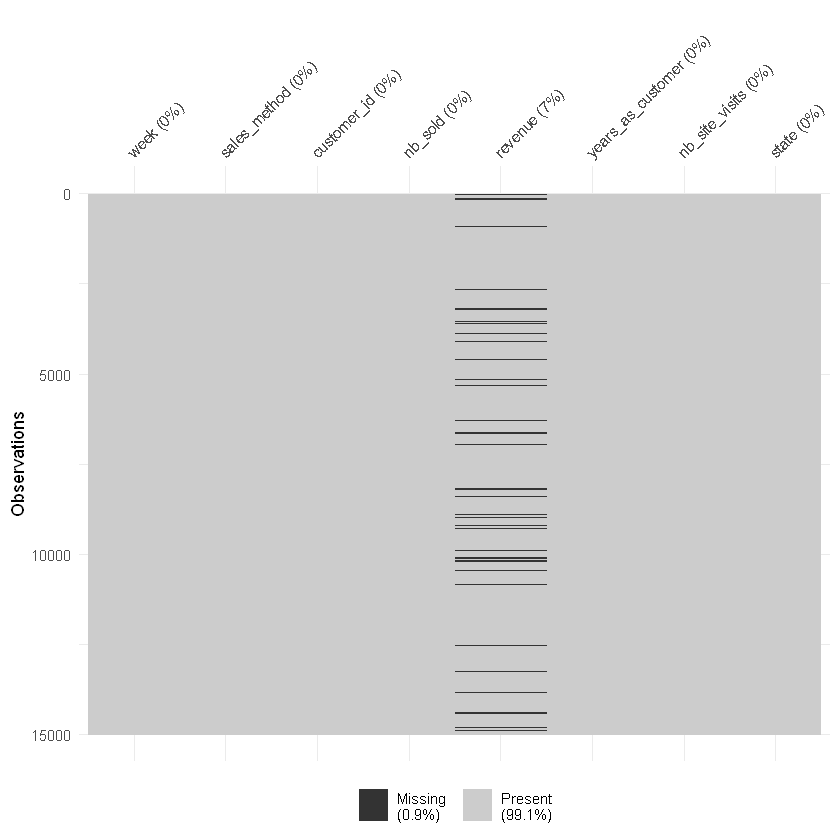

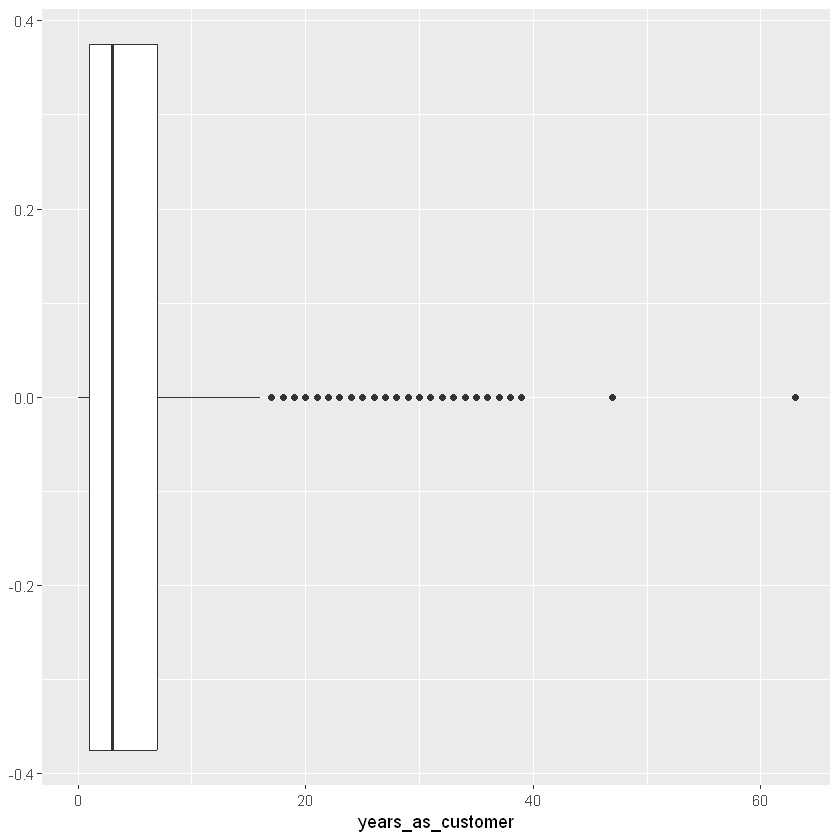

In [4]:
product_sales <- read_csv('product_sales.csv') # Reading the data in.

head(product_sales)

str(product_sales)

summary(product_sales)

unique_values <- function(x){
	length(table(x))
} # Function for retrieving all unique values from the x, it will be passed on to a mapping function.

map(product_sales, unique_values) # Function applied to all columns of the dataset.

vis_miss(product_sales) # Visualizes the missingness in each column.

# Let's plot the years_as_customer to see what's wrong with it.

ggplot(product_sales, aes(years_as_customer)) + geom_boxplot()

The dataset contains **15000** rows and **8** columns before cleaning and validation. I have validated the columns below:

- `week` is a numeric column with 6 unique values without missing values, same as the description. No cleaning needed but conversion to factor class would be sufficient. Since it is a factor class variable, summary statistics like mean or IQR are not meaningful.
- `sales_method` categorical column with 5 unique values has also no missing values, *but not all values are recorded same*. Therefore it has to be cleaned. This is due to entry or collection errors. 'Email + call' and 'Email' values has been coded in various ways, with missing or upper case characters. After cleaning, it will end up with 3 unique values.
- `customer_id` numeric column with 15000 values without missing values, same as the description. However, since it represents customer ids, no mathematical operations or summary statistics are relevant. No cleaning needed.
- `nb_sold column` a continuous numeric column with 10 unique values has no missing values. It's mean and median are exactly the same, signaling a possibility of a normal distribution. No cleaning needed.
- `revenue column` another continuous numerical column with 6743 unique values and *1074 NA* values. The NA values will be removed because the missingness is completely at random (MCAR) and it's just 1%. There is a slight difference between it's mean and median, normal distribution should be investigated. 
- `years_as_a_customer` is a numeric column has 42 unique values and no missing entries. It is not reasonable to check for mean and median since this column records time. **However, the maximum value of the column is 63**. Since company is founded at 1984, this value is impossible. There are 2 values over than 40, so it is safe to remove them.
- `nb_site_visits` is another numeric column with 27 unique values and also no missing values. It's mean and median are almost similar so the distribution can be normal. No cleaning needed.
- `state` is a categorical variable and has 50 unique values and no missing ones. No cleaning needed.

After cleaning, there will be **13924** rows left.

## Cleaning

In [5]:
product_sales %>% group_by(sales_method) %>% count()

product_sales <- product_sales %>% mutate(sales_method = str_to_lower(sales_method)) # Making all values in lower cases.

product_sales_cleaned <- product_sales %>% mutate(sales_method = str_replace_all(sales_method, 'em \\+ call', 'email + call')) # The double backslash is for escaping '+', which is a special character for regex.

product_sales_cleaned %>% group_by(sales_method) %>% count()

# Missingness looks like completely at random and also just a small percentage. Therefore, I can remove the data.

product_sales_cleaned <- product_sales_cleaned %>% drop_na()

# Removing the extreme values of years_as_customer

product_sales_cleaned <- product_sales_cleaned %>% filter(years_as_customer <= 39)

# Final row count

nrow(product_sales_cleaned)


sales_method,n
<chr>,<int>
Call,4962
Email,7456
Email + Call,2549
em + call,23
email,10


sales_method,n
<chr>,<int>
call,4962
email,7466
email + call,2572


[1] 13924

## Analysis

### How Many Customers Are There for Each Approach?

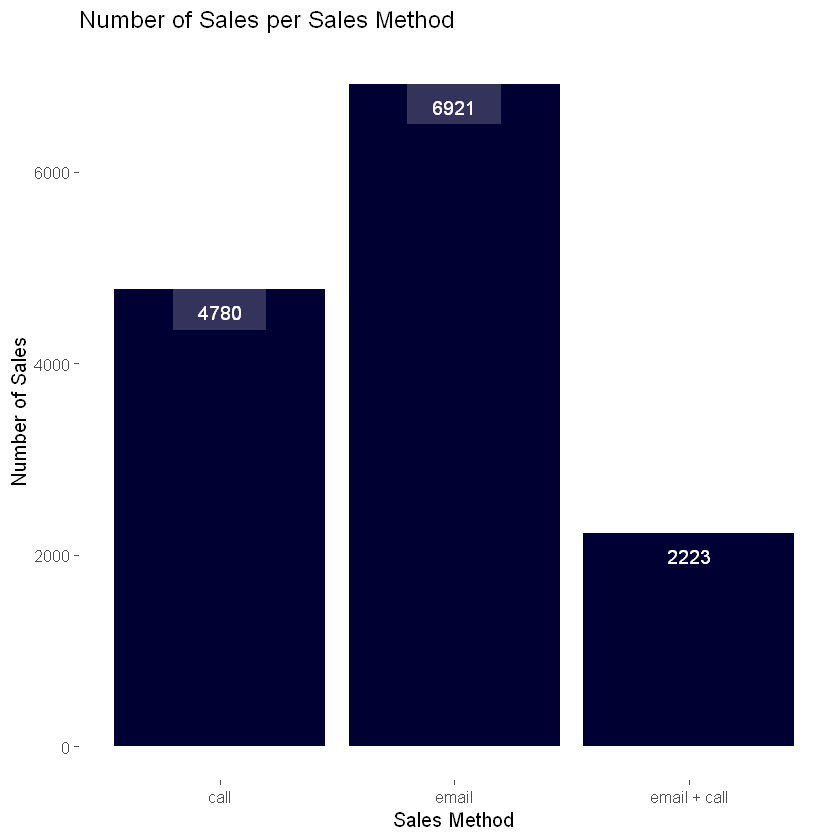

In [6]:
product_sales_cleaned %>%
  group_by(sales_method) %>%
  summarize(n = n()) %>%
  ungroup() %>%
  ggplot(aes(sales_method, n)) +
  geom_col(fill = '#000033') +
  geom_text(aes(label = n), vjust = 2, size = 4, col = 'white') +
  theme_few() +
  theme(panel.border = element_blank()) +
  annotate('rect', ymin = 4350, ymax = 4961, xmin = 0.8, xmax = 1.2, fill = 'gray100', alpha = 0.2) +
  annotate('rect', xmin = 1.8, xmax = 2.2, ymin = 6500, ymax = 7000, fill = 'gray100', alpha = 0.2) +
  labs(x = "Sales Method", y = "Number of Sales") +
  ggtitle("Number of Sales per Sales Method")


### What Does the Spread of Revenue Look Like, and for Each Method?

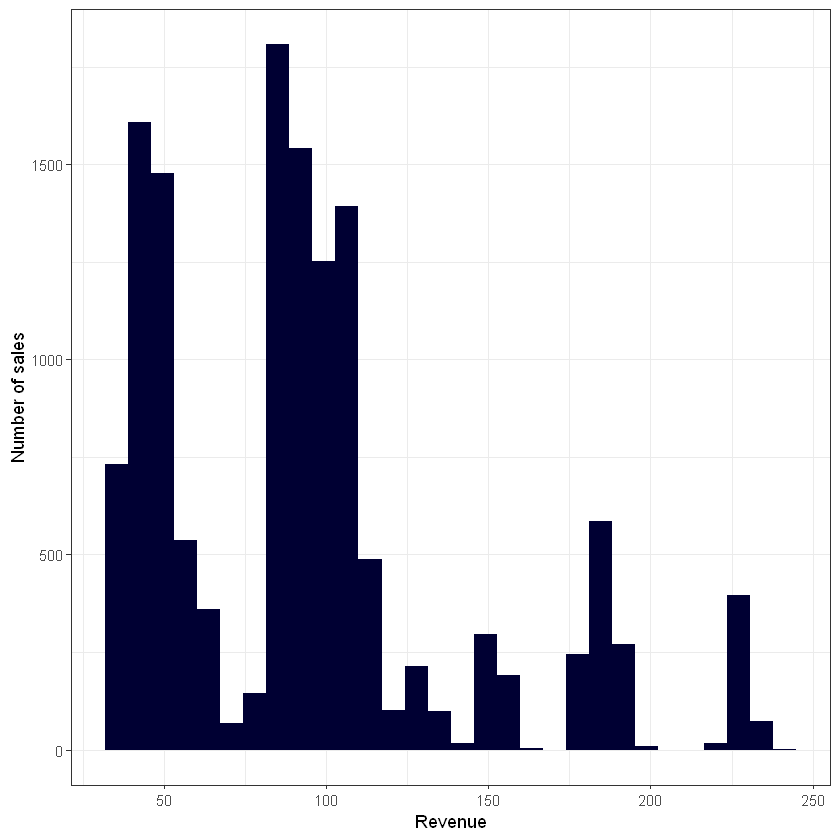

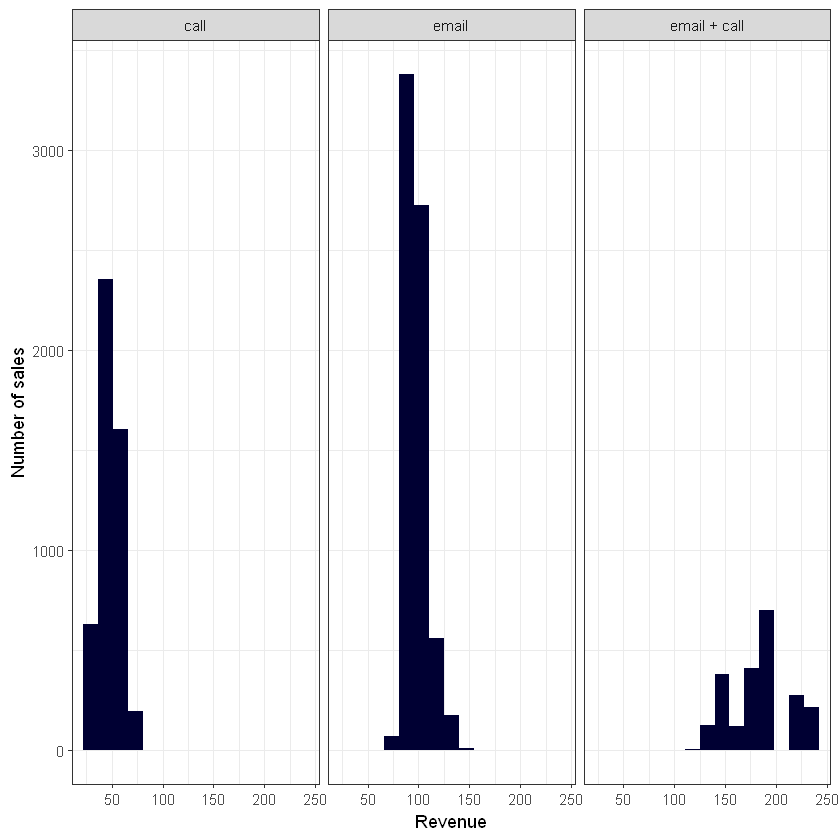

In [9]:
product_sales_cleaned %>% ggplot(aes(revenue)) + 
geom_histogram(bins = 30, fill = '#000033') + ylab("Number of sales") + 
xlab("Revenue") + theme_bw() # The spread of revenue.

product_sales_cleaned %>% ggplot(aes(revenue)) + 
geom_histogram(bins = 15, fill = '#000033') + 
facet_wrap(~sales_method) + 
theme_bw() + 
ylab("Number of sales") + xlab("Revenue") # Spread for each method

### Difference of Revenue Over Time

`summarise()` has grouped output by 'sales_method'. You can override using the `.groups` argument.


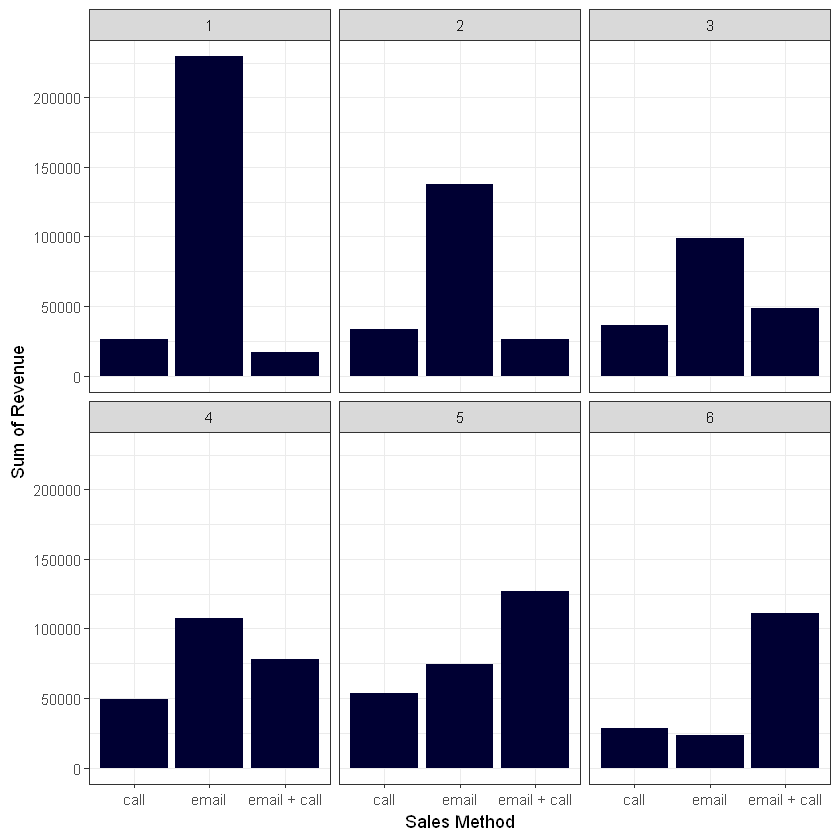

In [10]:
product_sales_cleaned %>%
  group_by(sales_method, week) %>%
  summarize(revenue_sum = sum(revenue)) %>%
  ungroup() %>%
  ggplot(aes(factor(sales_method, ordered = TRUE), revenue_sum)) +
  geom_col(fill = '#000033') +
  facet_wrap(~week) + 
  theme_bw() + 
  xlab("Sales Method") +
  ylab("Sum of Revenue")

The *email* method **in the first 4** weeks is bringing the most revenue. However, *email + call* takes the lead in **week 5 and 6**. If there are no long-term gain goals, the email method looks the best among the three.

## Business Metric for Analysis

In order to decide on which method to use, I want to create a business metric that measures how revenue shifts throughout the years as a customer. At previous steps of this analysis, it can be seen that time is an important factor for determining which sales method to use. That's why this business metric will be informative, especially if the company decides to target it's sales method deeper.

In [15]:
product_sales_cleaned <- product_sales_cleaned %>%
  left_join(
    product_sales_cleaned %>%
      group_by(years_as_customer) %>%
      summarize(revenue_years = mean(revenue)),
    by = "years_as_customer"
  )

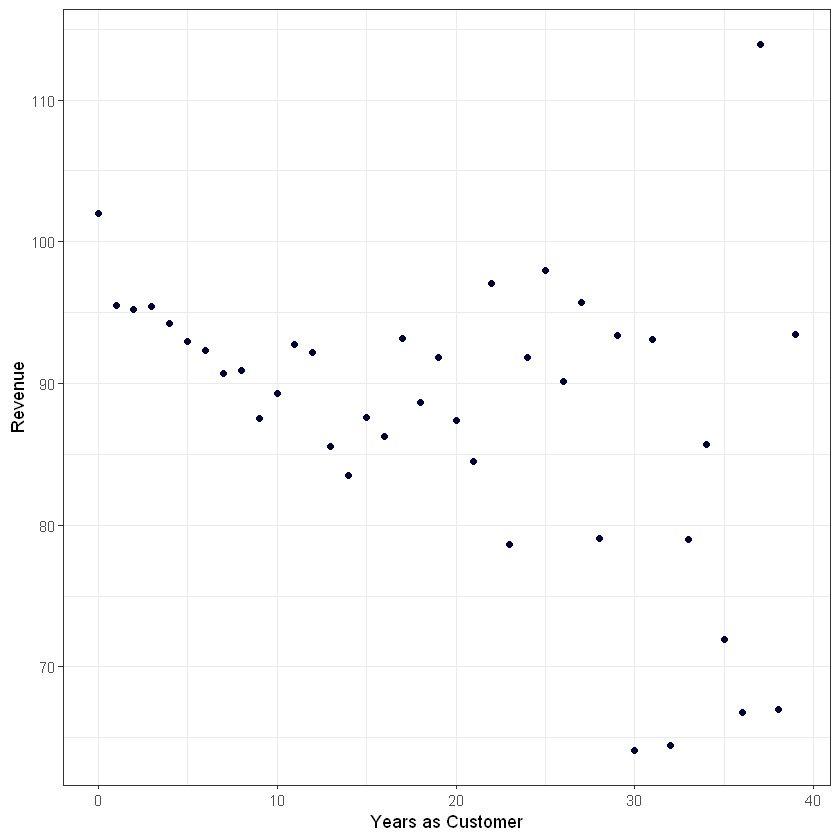

In [16]:
ggplot(product_sales_cleaned, aes(years_as_customer, revenue_years)) + 
geom_point(color = '#000033') +
theme_bw() +
xlab("Years as Customer") +
ylab("Revenue")

It seems like as the years of being customer increases, the revenue tends to decrease. Therefore, the business should better use the sales method which yields in revenue sooner. This rules out the option of Email + call.

### Which Method to Use?

The task is to decide on whether there are differences between the impact of these three methods on revenue_years, and which one makes the greatest impact. An effect of a non-numeric independent variable on a numeric dependent variable can be measured via an **ANOVA**. However, ANOVA has assumptions. If those assumptions are not met, a **Kruskal-Wallis** test will be carried out.

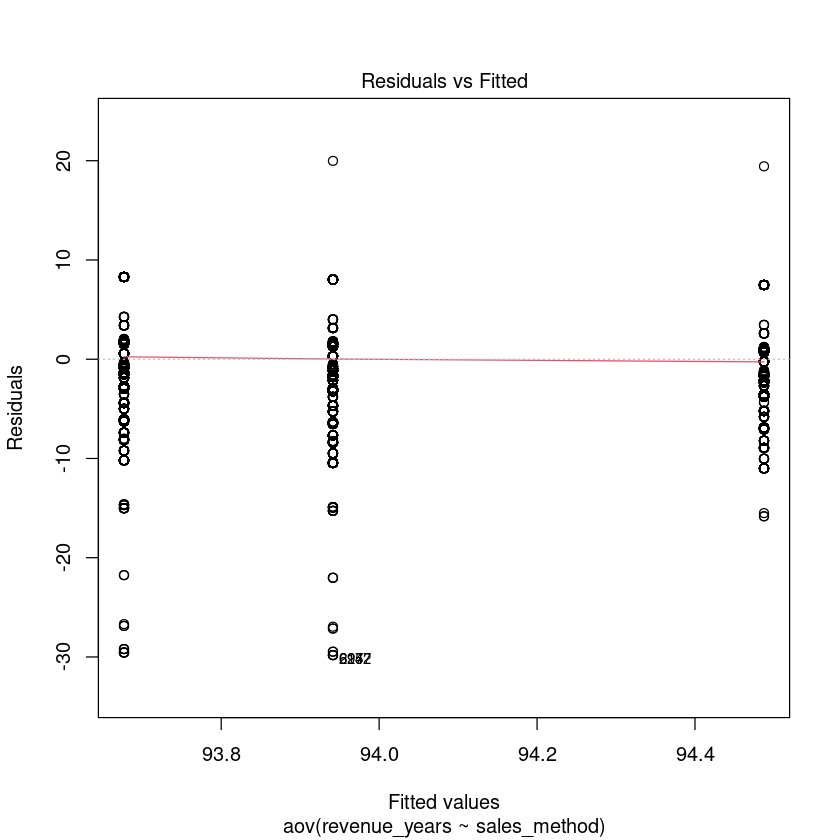

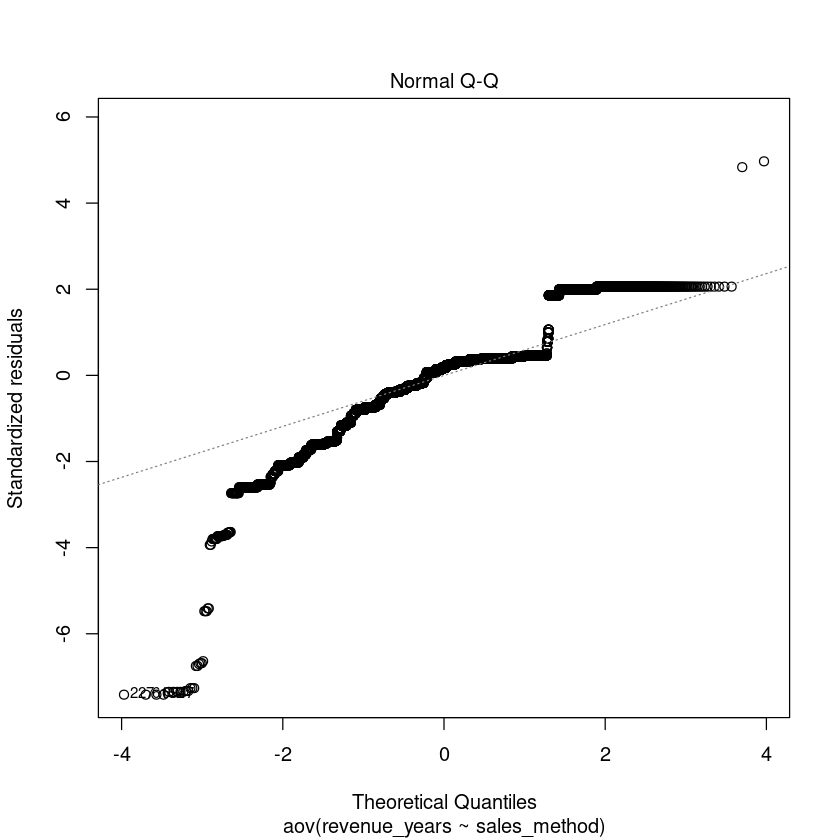

In [11]:
aov_test <- aov(revenue_years ~ sales_method, data = product_sales_cleaned)

plot(aov_test, which = 1:2)

The residuals are **not** normally and homoegeneously distributed. After transformations, the normality of the variable can be issued but *homoscedasticity* can not be obtained. Therefore, **Kruskal-Wallis** test will be carried out. The transformation and the plots afterwards are above.

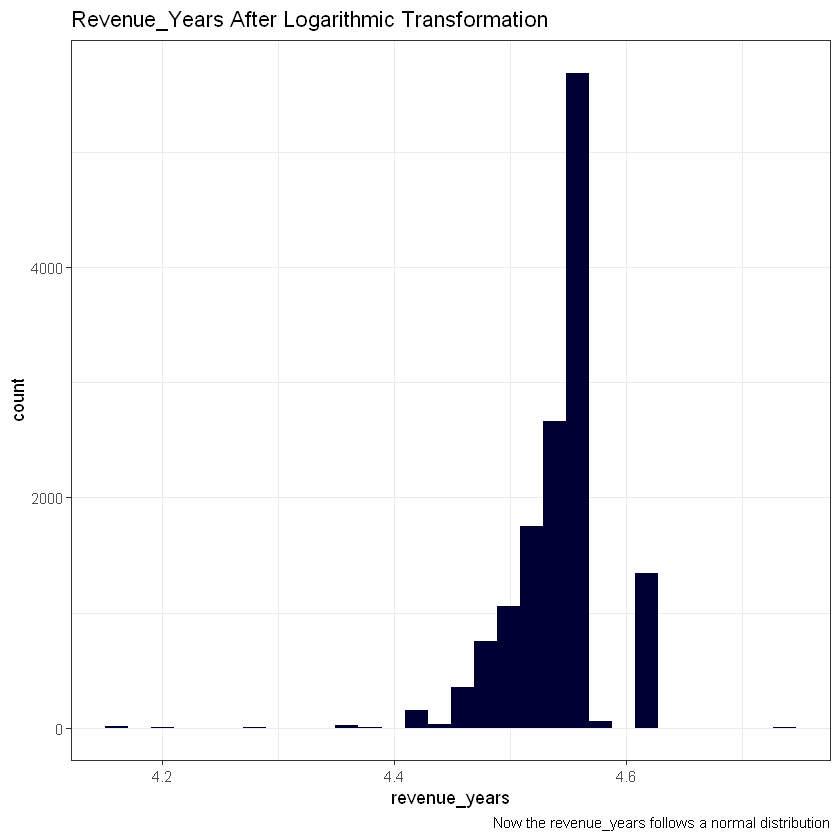

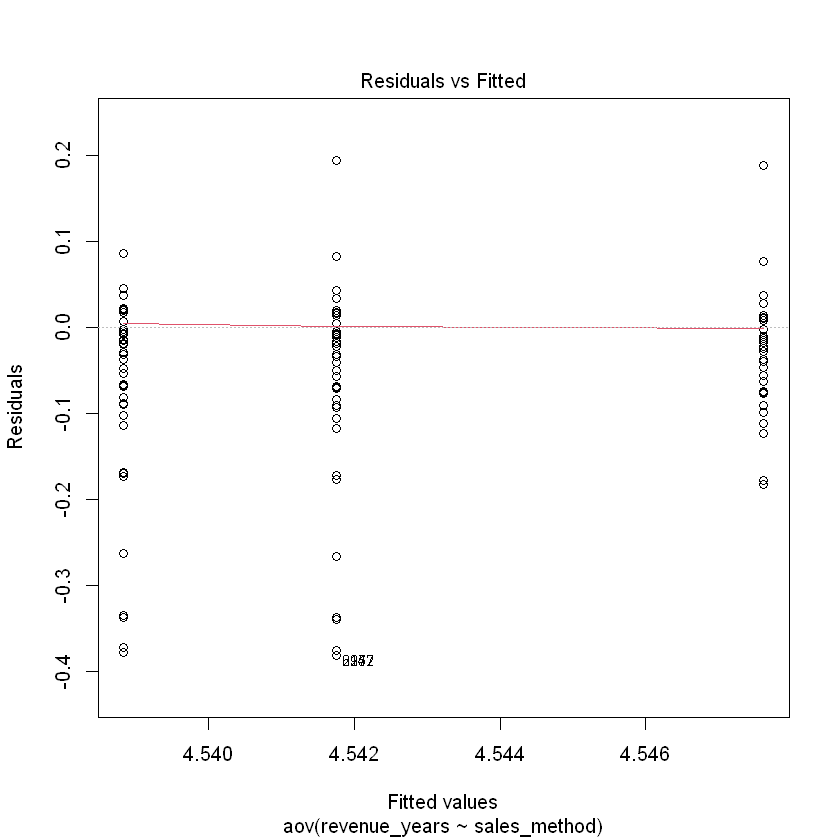

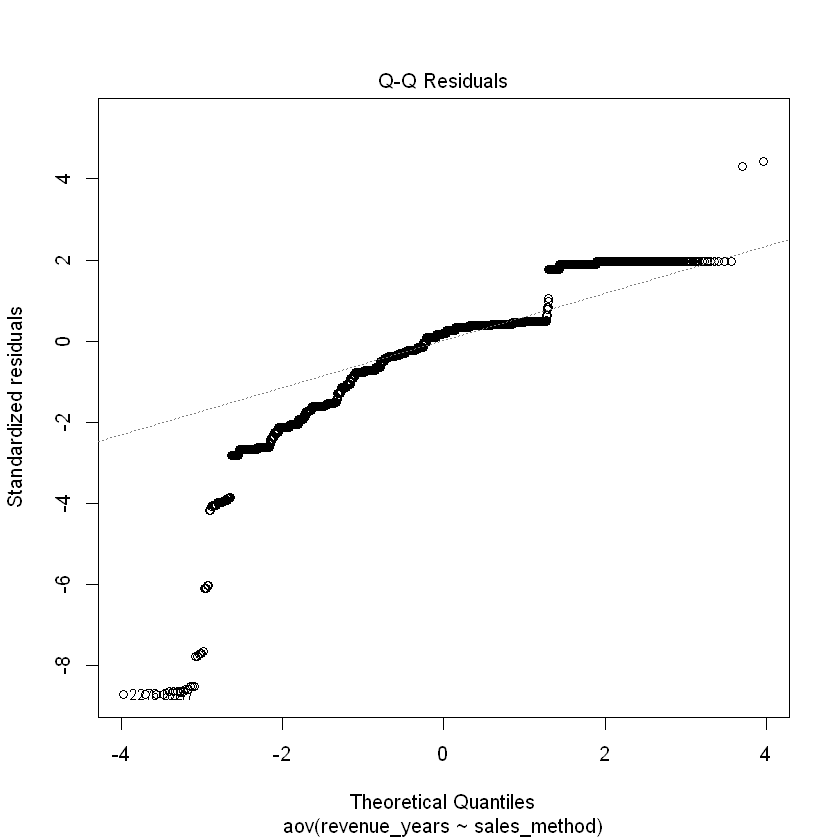

In [17]:
product_sales_cleaned <- product_sales_cleaned %>% mutate(sales_method = factor(sales_method))

product_sales_model <- product_sales_cleaned %>% mutate(revenue_years = log(revenue_years))

ggplot(product_sales_model, aes(revenue_years)) + geom_histogram(bins = 30, fill = '#000033') + 
labs(title = 'Revenue_Years After Logarithmic Transformation', 
     caption = 'Now the revenue_years follows a normal distribution') +
theme_bw()

aov_transformed <- aov(revenue_years ~ sales_method, data = product_sales_model)

plot(aov_transformed, which = 1:2)


### Kruskal-Wallis Test

In [18]:
kruskal_result <- kruskal.test(revenue_years ~ sales_method, data = product_sales_cleaned)

kruskal_result

pairwise_result <- dunn.test(product_sales_cleaned$revenue_years, g = product_sales_cleaned$sales_method, method = "bonferroni")

# Print the pairwise comparison result

pairwise_result


	Kruskal-Wallis rank sum test

data:  revenue_years by sales_method
Kruskal-Wallis chi-squared = 42.331, df = 2, p-value = 6.427e-10


  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 42.3308, df = 2, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |       call      email
---------+----------------------
   email |  -1.921555
         |     0.0820
         |
email +  |  -6.434746  -5.293683
         |    0.0000*    0.0000*

alpha = 0.05
Reject Ho if p <= alpha/2


ERROR: Error: No tidy method recognized for this list.


## Analysis

According to the Kruskal-Wallis test, there are *significant* differences between *email*, *email + call* and just *call*. However, the difference between email and call are not significant for 0.05 p value but significant for 0.1. Since small differences are advised to be overlooked, one can claim that the changes between the sales methods are significant. 

Deriving on previous plots, it can be seen that emailing is the most rewarding choice. Although email + call increases in time, the revenue_years metric shows that this increase does not translate to the longevity of the customer in terms of years. Yet, the total revenue gained from mailing is prevalent in every week of the methods applied. Thus, in summation and in consistence, **emailing** is a better option.

### Bonus: Which States are the Most Suitable for Email + Call?

Although email is generally preferred, the states which respond to *email + call* the highest can be found and this information can be utilized for long-term plans by the management. The gist is, if there are long-term aims, the states that respond to *email + call* most should be focused more. 

`summarise()` has grouped output by 'state', 'sales_method'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'state'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'state', 'sales_method'. You can override using the `.groups` argument.


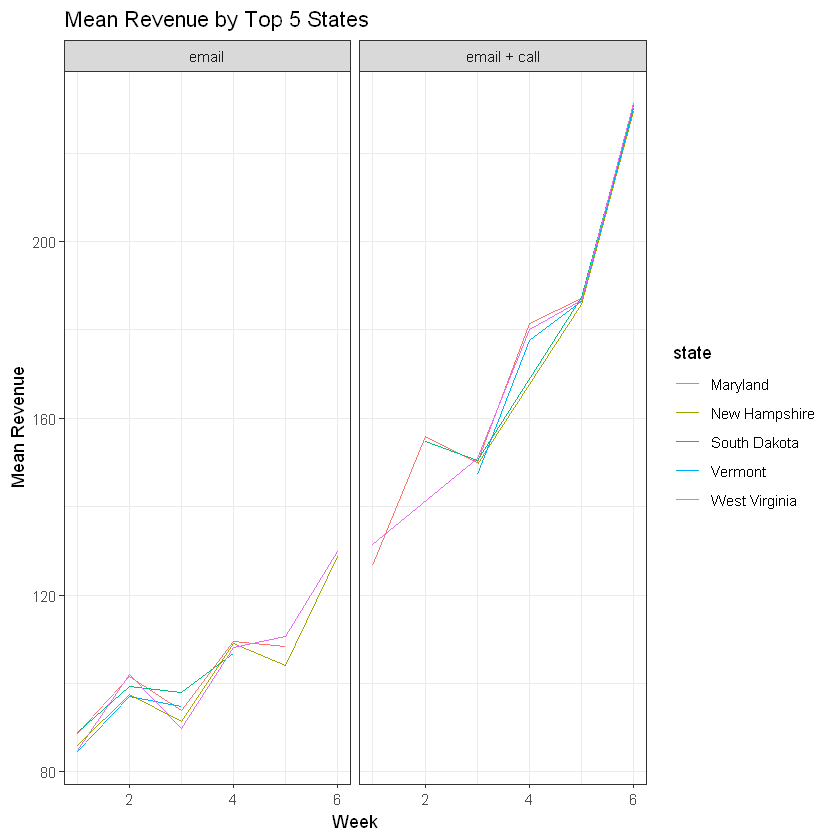

In [19]:
p_s_states <- product_sales_cleaned %>% group_by(state, sales_method, week) %>% summarize(mean_method = mean(revenue))

p_s_states_top10 <- p_s_states %>% group_by(state, week) %>% filter(sales_method == 'email + call') %>% summarize(e_c_mean = mean(mean_method)) %>% arrange(desc(e_c_mean))

top5_states <- p_s_states_top10$state[1:5]

product_sales_cleaned %>%
  filter(state %in% top5_states & sales_method %in% c('email + call','email')) %>%
  group_by(state, sales_method, week) %>%
  summarize(revenue_mean = mean(revenue)) %>%
  arrange(week) %>%
  ggplot(aes(week, revenue_mean, col = state)) +
  geom_line() +
  facet_wrap(~sales_method) +
  theme_bw() +
  xlab("Week") +
  ylab("Mean Revenue") +
  ggtitle("Mean Revenue by Top 5 States")

Compared to *mail* *mail + call*in these **top 5 states** are signifying a clearly better performance. Thus, for longer aimed campaings, the impact of using email + call can be seen and if decided, can be implemented.